<a href="https://colab.research.google.com/github/hyeonukim/DataProcessing_ImageHandling/blob/main/How_to_handle_Data%2C_and_Images(6)_Image_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV Image Transformation

cv2.resize(image, dsize, fx, fy, interpoloation): Changes the size of the Image.
- dsize: Manual Size
- fx: x ratio
- fy: y ratio
- interpoloation: There are various interpoloation flags that could be used
  - INTER_CUBIC: used to make Image size bigger
  - INTER_AREA: used to make Image size smaller
  - More here: [https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html)

Interpolation is used when Image's size changes to control the values between pixels



In [2]:
from google.colab import files
uploaded = files.upload()

Saving chanelsun.jpg to chanelsun.jpg


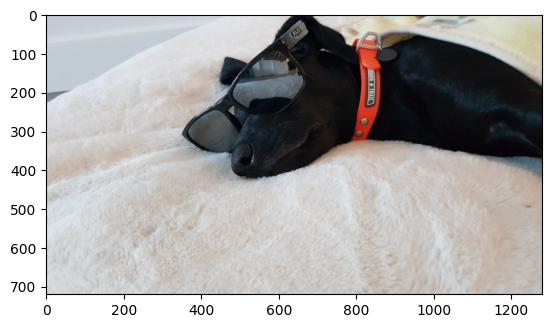

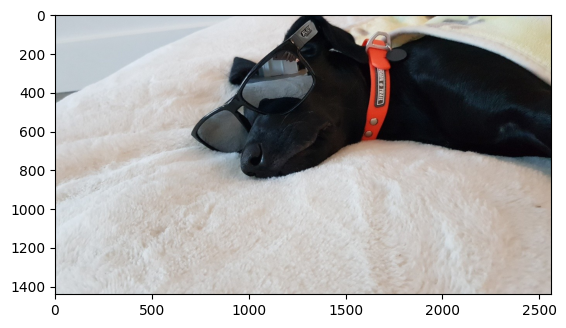

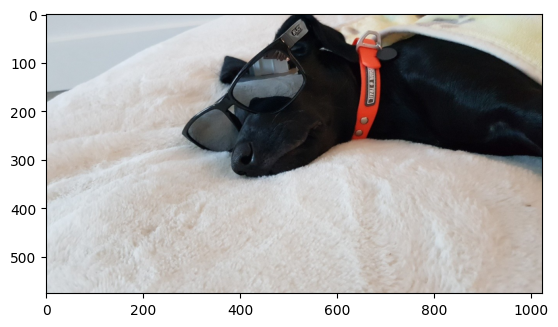

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('chanelsun.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# resize the image with 2 * x value, and 2 * y value using INTER_CUBIC as interpolation
expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

# resize the image with 0.8* x value, and 0.8* y value using INTER_AREA as interpolation
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

## Image Translation

cv2.warpAffine(image, M, dsize): Translate the Image
- M: transformation Matrix
- dsize: Manual Size

M = $\begin{bmatrix}1 &0 & t_x\\0 & 1 & t_y \end{bmatrix} * \begin{bmatrix}x \\ y\end{bmatrix} = (x+t_x, y+t_y)$

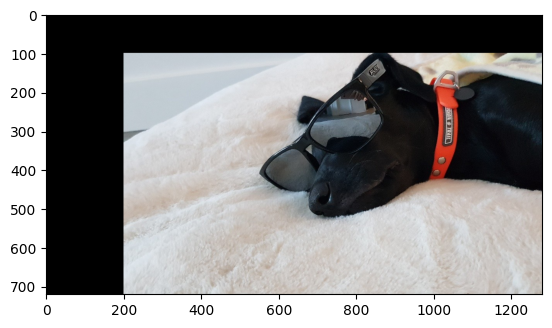

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('chanelsun.jpg')

height, width = image.shape[:2]

# move x value to 200, and y value to 100 using Matrix multiplication
# [[1, 0, 200]  * [[x],   =  (x + 200, y + 100)
#  [0, 1, 100]]    [y]]
M = np.float32([[1, 0, 200], [0, 1, 100]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## Image Rotation

The basic Matrix for rotation looks like this:
$\begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix} $

If you wanted to add the rotation and scale, the rotation matrix becomes:

where $\alpha = scale * \cos{\theta}, \beta = scale * \sin{\theta}$

$\begin{bmatrix} \alpha & \beta & (1-\alpha) * center.x - \beta * center.y \\ -\beta & \alpha & \beta * center.x + (1-\alpha) * center.y \end{bmatrix} $

but because writing this matrix is complex, we have a function that makes this in openCV

cv2.getRotationMatrix2D(center, angle, scale): creates a transformation matrix for image rotation
- cetner: rotation center
- angle: rotation angle
- scale: scale factor



[[ 3.061617e-17  5.000000e-01  4.600000e+02]
 [-5.000000e-01  3.061617e-17  6.800000e+02]]


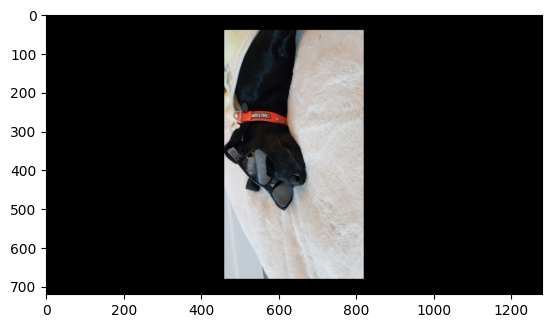

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('chanelsun.jpg')

height, width = image.shape[:2]

# center = right in the middle of image, rotation = 90 degrees, scale/size = 0.5
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
print(M)
# using the rotation matrix, we rotate the image
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()